# Use Pandas and SKLearn to demonstrate Linear Regression
### Ref: https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Section 1. A toy example
### rand() is a numpy function to generate rnadom numbers between 0 and 1
### We generate some random numbers $x$ and $y$ using the formula below

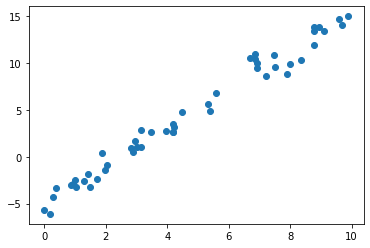

In [4]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

### Import the LinearRegression funciton in SKLearn Library
### Fit (or Learn) a linear function from $x$ and $y$

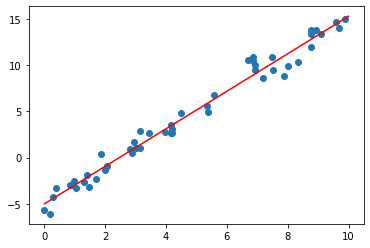

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')

### Confirm the coefficient of the fitted model matched our expectation

In [6]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


# Section 2.  Use a real data set with mutiple inputs to predict house prices
### This will involve a few steps:
1. Extract the data from a csv file using the pandas dataframe
2. Examine the data using basic statistics such as mean and percentile
3. Study the correlation between the inputs using heatmaps
4. Fit (or Learn) a linear model to predict prices with multipler inputs
5. Examine the performance / success of the fitted model using $R^2$


In [7]:
# Check out https://www.kaggle.com/gopalchettri/usa-housing for more information about the data set
data = pd.read_csv("Data/USA_Housing.csv", thousands=',')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


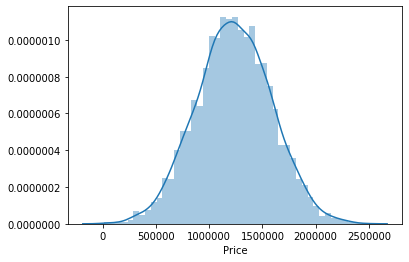

In [10]:
sns.distplot(data['Price'])

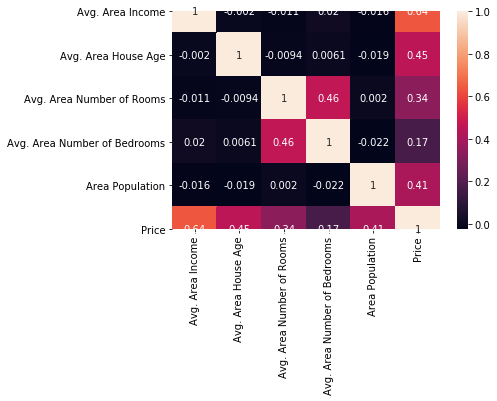

In [11]:
sns.heatmap(data.corr(), annot = True)

In [12]:
# The following pairplot will take sometimes to run and it is optional
# sns.pairplot(data)

# Fitting a linear regression model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

### Let's look at the scatter plot between price and each input variable

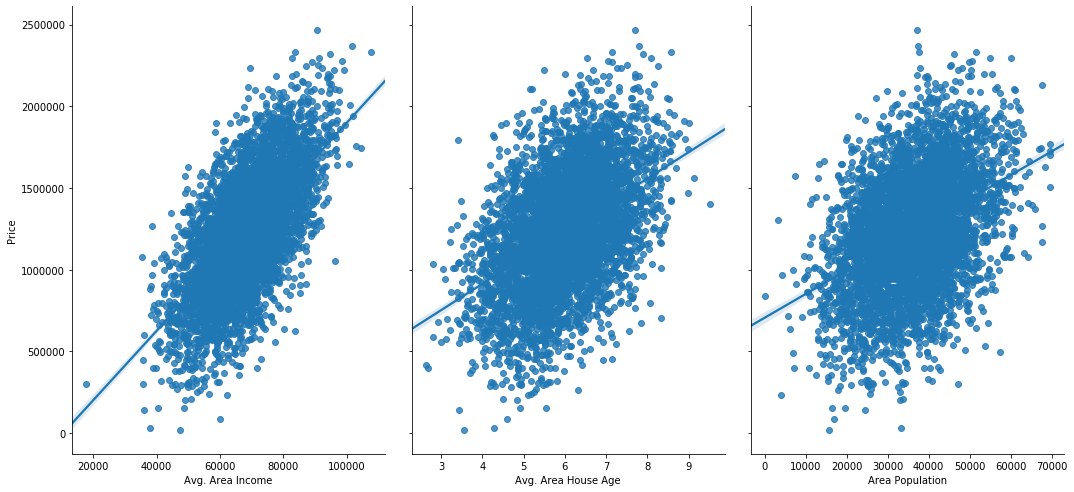

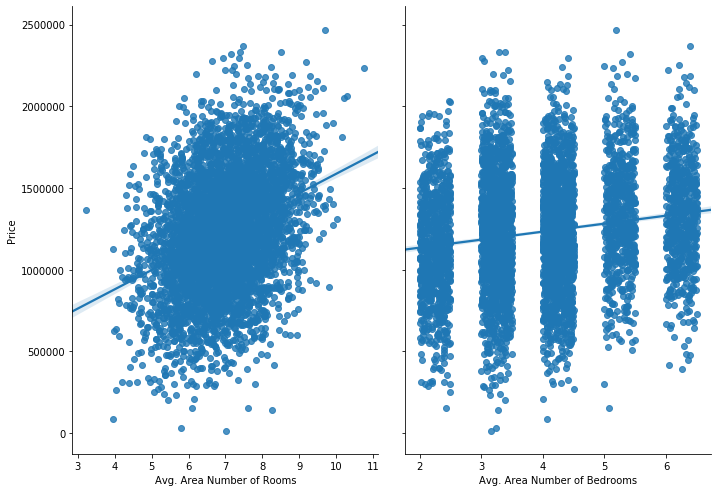

In [14]:
sns.pairplot(data, x_vars=['Avg. Area Income','Avg. Area House Age','Area Population'], y_vars='Price', height=7, aspect=0.7, kind='reg')
sns.pairplot(data, x_vars=['Avg. Area Number of Rooms','Avg. Area Number of Bedrooms'], y_vars='Price', height=7, aspect=0.7, kind='reg')

In [15]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

In [16]:
print(X.shape)
print(y.shape)

(5000, 5)
(5000,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 5)
(1000, 5)
(4000,)
(1000,)


In [19]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print(lm.intercept_)
print(lm.coef_)

-2635072.900931358
[2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]


In [21]:
pd.DataFrame(data=lm.coef_.reshape(5,1),index=X_train.columns,columns=['Coeff'])

,Coeff
Avg. Area Income,21.652206
Avg. Area House Age,164666.480722
Avg. Area Number of Rooms,119624.012232
Avg. Area Number of Bedrooms,2440.377611
Area Population,15.270313


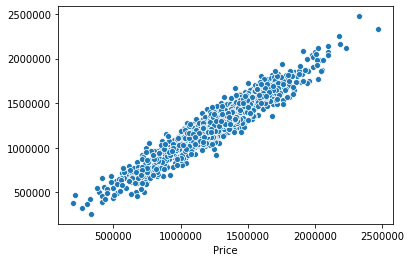

In [22]:
y_predict = lm.predict(X_test)
sns.scatterplot(y_test, y_predict)

We measure performance / success of linear regression model by $R^2$

[Check out khan Academy Video of $R^2$](https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/v/r-squared-or-coefficient-of-determination)

In [23]:
print(mean_absolute_error(y_test, y_predict))
print(r2_score(y_test, y_predict))

80879.09723487175
0.9179971706834578


### Exercise: Fit a model with only average income as the input variables
### Hint: You only need to change one line of code

# Section 3. Can we do better than a linear regresison model?

### A [gradient boosting decision tree](https://towardsdatascience.com/machine-learning-part-18-boosting-algorithms-gradient-boosting-in-python-ef5ae6965be4) is a popular machine learning algorithm 
### that we will apply to our house price prediction problem.

### As before, we need to load the library from SKlearn library first

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [62]:
GBR = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1
)
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#### There are a few "knobs" or hyperparameters to tune the gradient boosting decision tree model
- max_depth = number of leaves of each tree
- n_estimators = number of trees in the ensemble
- learning_rate = how fast the next tree will contribute the final decision 

In [63]:
y_pred_GBR = GBR.predict(X_test)

In [64]:
print(mean_absolute_error(y_test, y_pred_GBR))
print(r2_score(y_test, y_pred_GBR))

168809.97013030565
0.6376020554753397


#### The performance of mean asbolute error and $R^2$ are worse than the linear regression. Then why the more sophisticated model?

#### Let's try to tune the model by changing the number of trees in the ensemble

In [82]:
def GBR_performance(num_of_trees):
    best_GBR = GradientBoostingRegressor(
        max_depth=2,
        n_estimators= num_of_trees,
        learning_rate= 1.0
    )
    best_GBR.fit(X_train, y_train)
    y_pred_best_GBR = best_GBR.predict(X_test)
    return mean_absolute_error(y_test, y_pred_best_GBR), r2_score(y_test, y_pred_best_GBR)

In [83]:
# performance of 10 trees
GBR_performance(10)

(115130.83299604576, 0.8287626972455533)

In [84]:
for n in np.linspace(5, 100, 20, dtype=int):
    print(n, GBR_performance(n))

5 (144168.4700219448, 0.7310069371918317)
10 (115130.83299604576, 0.8287626972455533)
15 (104317.03497805736, 0.8614575941170829)
20 (99733.56269205597, 0.87329911805726)
25 (95070.33259042147, 0.8826576917453319)
30 (92700.61022161934, 0.8901117759295253)
35 (92098.74348485578, 0.891381076275713)
40 (90776.0006893656, 0.8951681755404087)
45 (90687.03206995851, 0.8956677715323659)
50 (90449.95002891794, 0.8964209499475425)
55 (90072.88320145106, 0.8967304161477632)
60 (90580.79945569705, 0.8950231149349607)
65 (90922.10379720994, 0.8943989810512464)
70 (91101.17069549179, 0.8946261836665289)
75 (90845.13239678038, 0.8952544891727151)
80 (90262.03455086643, 0.8961756064301537)
85 (91213.18124269444, 0.8948613084719539)
90 (92037.05302012493, 0.8938656581556736)
95 (91252.38599758375, 0.8955428996180086)
100 (91130.26300718167, 0.8956185884642406)


#### It turns out the GBR can not outperform linear regression with more and more trees. It is interesting to know that the more complex model does not always win.

In [86]:
# We will try a different boosting machine library later
# import xgboost as xgb